In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

In [5]:
csvData = pd.read_csv('GISSSurfaceTemperatureAnalysis.csv')
csvData

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,1880,-0.30,-0.21,-0.18,-0.28,-0.14,-0.29,-0.24,-0.08,-0.17,-0.16,-0.19,-0.22,-0.2,***,***,-0.20,-0.2,-0.17
1,1881,-0.09,-0.14,0.01,-0.03,-0.04,-0.28,-0.06,-0.02,-0.08,-0.19,-0.26,-0.15,-0.11,-0.12,-0.15,-0.02,-0.12,-0.18
2,1882,0.10,0.09,0.02,-0.20,-0.17,-0.25,-0.10,0.04,-0.01,-0.22,-0.21,-0.25,-0.1,-0.09,0.01,-0.12,-0.1,-0.14
3,1883,-0.33,-0.42,-0.17,-0.24,-0.25,-0.11,-0.08,-0.13,-0.18,-0.11,-0.2,-0.18,-0.2,-0.21,-0.33,-0.22,-0.11,-0.16
4,1884,-0.18,-0.11,-0.34,-0.36,-0.31,-0.38,-0.34,-0.26,-0.23,-0.22,-0.3,-0.29,-0.28,-0.27,-0.16,-0.34,-0.32,-0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,2012,0.46,0.49,0.57,0.69,0.77,0.62,0.57,0.64,0.76,0.79,0.75,0.52,0.63,0.64,0.49,0.68,0.61,0.76
133,2013,0.67,0.56,0.65,0.53,0.62,0.65,0.59,0.66,0.77,0.7,0.81,0.67,0.66,0.64,0.58,0.60,0.63,0.76
134,2014,0.73,0.51,0.77,0.79,0.87,0.66,0.58,0.82,0.91,0.86,0.69,0.79,0.75,0.74,0.64,0.81,0.69,0.82
135,2015,0.82,0.87,0.91,0.74,0.79,0.79,0.73,0.79,0.82,1.07,1.02,1.1,0.87,0.84,0.83,0.81,0.77,0.97


In [6]:
csvData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 19 columns):
Year    137 non-null int64
Jan     137 non-null float64
Feb     137 non-null float64
Mar     137 non-null float64
Apr     137 non-null float64
May     137 non-null float64
Jun     137 non-null float64
Jul     137 non-null float64
Aug     137 non-null object
Sep     137 non-null object
Oct     137 non-null object
Nov     137 non-null object
Dec     137 non-null object
J-D     137 non-null object
D-N     137 non-null object
DJF     137 non-null object
MAM     137 non-null float64
JJA     137 non-null object
SON     137 non-null object
dtypes: float64(8), int64(1), object(10)
memory usage: 20.5+ KB


In [7]:
csvData.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,1880,-0.30,-0.21,-0.18,-0.28,-0.14,-0.29,-0.24,-0.08,-0.17,-0.16,-0.19,-0.22,-0.2,***,***,-0.20,-0.2,-0.17
1,1881,-0.09,-0.14,0.01,-0.03,-0.04,-0.28,-0.06,-0.02,-0.08,-0.19,-0.26,-0.15,-0.11,-0.12,-0.15,-0.02,-0.12,-0.18
2,1882,0.10,0.09,0.02,-0.20,-0.17,-0.25,-0.10,0.04,-0.01,-0.22,-0.21,-0.25,-0.1,-0.09,0.01,-0.12,-0.1,-0.14
3,1883,-0.33,-0.42,-0.17,-0.24,-0.25,-0.11,-0.08,-0.13,-0.18,-0.11,-0.2,-0.18,-0.2,-0.21,-0.33,-0.22,-0.11,-0.16
4,1884,-0.18,-0.11,-0.34,-0.36,-0.31,-0.38,-0.34,-0.26,-0.23,-0.22,-0.3,-0.29,-0.28,-0.27,-0.16,-0.34,-0.32,-0.25


In [8]:
monthly = csvData.iloc[:, :13]
for col in monthly.columns:
    monthly[col] = pd.to_numeric(monthly[col], errors='coerce')

In [9]:
monthly = monthly.set_index('Year')

In [10]:
monthly['Ann'] = monthly.mean(axis=1)

In [11]:
monthly.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Ann
Year,,,,,,,,,,,,,
1880,-0.30,-0.21,-0.18,-0.28,-0.14,-0.29,-0.24,-0.08,-0.17,-0.16,-0.19,-0.22,-0.205000
1881,-0.09,-0.14,0.01,-0.03,-0.04,-0.28,-0.06,-0.02,-0.08,-0.19,-0.26,-0.15,-0.110833
1882,0.10,0.09,0.02,-0.20,-0.17,-0.25,-0.10,0.04,-0.01,-0.22,-0.21,-0.25,-0.096667
1883,-0.33,-0.42,-0.17,-0.24,-0.25,-0.11,-0.08,-0.13,-0.18,-0.11,-0.20,-0.18,-0.200000
1884,-0.18,-0.11,-0.34,-0.36,-0.31,-0.38,-0.34,-0.26,-0.23,-0.22,-0.30,-0.29,-0.276667


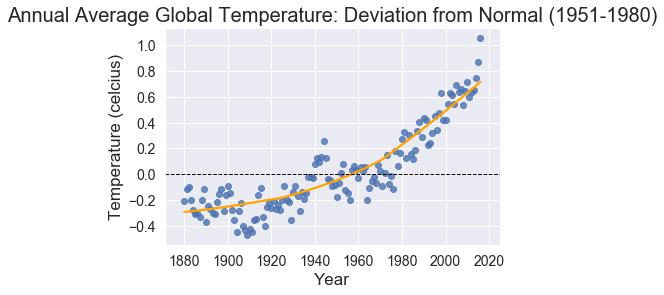

In [12]:
sns.regplot(x=monthly.index.values, y=monthly.Ann, lowess=True, line_kws={"color": "orange"})
plt.title("Annual Average Global Temperature: Deviation from Normal (1951-1980)", size=20)
plt.ylabel("Temperature (celcius)", size=17)
plt.xlabel("Year", size=17)
plt.xticks(size=14)
plt.yticks(size=14)
plt.axhline(y=0, linewidth=1, ls='--', color='black')
